In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math
import sys
import random
import csv

In [2]:
df = pd.read_csv('train_new.csv')

In [3]:
df.head()

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5


In [4]:
df['測項'].unique()

array(['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
       'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC',
       'WIND_SPEED', 'WS_HR'], dtype=object)

In [5]:
data = dict()
for item in df['測項'].unique():
    data[item] = []

In [6]:
def process(row):
    #print(row['測項'])
    item = row['測項']
    # prepare the measuring value for 24hours
    measuring_value = row.iloc[3:]
    data[item].extend(measuring_value)

In [7]:
df.apply(process, axis=1)
print('preprocess data...')

preprocess data...


## tranform dictionary `data` to a new DataFrame

In [8]:
df_data = pd.DataFrame.from_dict(data,dtype=np.float64)

In [9]:
df_data[5732:5740]

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
5732,14.0,1.7,0.31,0.22,1.8,14.0,16.0,19.0,48.0,11.0,NR,83.0,2.7,1.9,80.0,106.0,2.7,1.0
5733,14.0,1.7,0.26,0.08,1.4,8.9,10.0,22.0,36.0,0.0,0.2,85.0,2.4,1.8,72.0,102.0,1.9,1.2
5734,14.0,1.7,0.20,0.03,1.5,4.4,5.9,32.0,24.0,7.0,NR,84.0,2.0,1.7,79.0,99.0,2.9,1.8
5735,15.0,1.7,0.19,0.04,1.4,3.7,5.1,32.0,29.0,7.0,0.4,82.0,1.9,1.7,77.0,22.0,0.7,1.6
5736,14.0,1.7,0.21,0.06,1.4,8.5,9.9,23.0,17.0,6.0,0.2,88.0,1.6,1.8,46.0,36.0,1.9,0.7
5737,14.0,1.7,0.20,0.09,1.6,8.7,10.0,22.0,22.0,1.0,NR,91.0,1.4,1.8,13.0,55.0,2.4,0.8
5738,14.0,1.7,0.17,0.05,1.3,4.1,5.4,32.0,11.0,1.0,NR,89.0,0.8,1.8,61.0,72.0,1.9,1.8
5739,14.0,1.7,0.17,0.06,0.3,6.3,6.6,30.0,16.0,1.0,NR,88.0,1.5,1.8,44.0,327.0,2.8,1.0


In [10]:
# replace NR in column[RAINFALL] with 0
df_data['RAINFALL'] = df_data['RAINFALL'].apply(lambda x: float(0) if x =='NR' else float(x))

In [11]:
df_data[5732:5740]

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
5732,14.0,1.7,0.31,0.22,1.8,14.0,16.0,19.0,48.0,11.0,0.0,83.0,2.7,1.9,80.0,106.0,2.7,1.0
5733,14.0,1.7,0.26,0.08,1.4,8.9,10.0,22.0,36.0,0.0,0.2,85.0,2.4,1.8,72.0,102.0,1.9,1.2
5734,14.0,1.7,0.20,0.03,1.5,4.4,5.9,32.0,24.0,7.0,0.0,84.0,2.0,1.7,79.0,99.0,2.9,1.8
5735,15.0,1.7,0.19,0.04,1.4,3.7,5.1,32.0,29.0,7.0,0.4,82.0,1.9,1.7,77.0,22.0,0.7,1.6
5736,14.0,1.7,0.21,0.06,1.4,8.5,9.9,23.0,17.0,6.0,0.2,88.0,1.6,1.8,46.0,36.0,1.9,0.7
5737,14.0,1.7,0.20,0.09,1.6,8.7,10.0,22.0,22.0,1.0,0.0,91.0,1.4,1.8,13.0,55.0,2.4,0.8
5738,14.0,1.7,0.17,0.05,1.3,4.1,5.4,32.0,11.0,1.0,0.0,89.0,0.8,1.8,61.0,72.0,1.9,1.8
5739,14.0,1.7,0.17,0.06,0.3,6.3,6.6,30.0,16.0,1.0,0.0,88.0,1.5,1.8,44.0,327.0,2.8,1.0


In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 18 columns):
AMB_TEMP      5760 non-null float64
CH4           5760 non-null float64
CO            5760 non-null float64
NMHC          5760 non-null float64
NO            5760 non-null float64
NO2           5760 non-null float64
NOx           5760 non-null float64
O3            5760 non-null float64
PM10          5760 non-null float64
PM2.5         5760 non-null float64
RAINFALL      5760 non-null float64
RH            5760 non-null float64
SO2           5760 non-null float64
THC           5760 non-null float64
WD_HR         5760 non-null float64
WIND_DIREC    5760 non-null float64
WIND_SPEED    5760 non-null float64
WS_HR         5760 non-null float64
dtypes: float64(18)
memory usage: 810.1 KB


## train a model with linear regression

### case1: using all 18 measuring values

### prepare training data for predicting PM2.5
#### train_x: 
each observation in `train_x` represents all 18 kinds of measuring values in a continuous 9-hour period (we call it a `Time Unit`) 

according to the original data, each month has 471 `Time Units`, so train_x contains $471*12=5652$ rows, $9*18=162$ columns
#### train_y: 
PM2.5 for the 10th hour 

train_y contains $471*12=5652$ rows

In [13]:
train_x = []
train_y = []
months = 12
hours = 9
units = 471

for month in range(months):
    #print('month: {}'.format(month))
    for unit in range(units):
        #print('unit: {}'.format(unit))
        x = []
        for h in range(hours):
            #print('hour: {}'.format(h))
            x.extend(df_data.iloc[480*month+unit+h].tolist())
        train_x.append(x)
        y = df_data.iloc[480*month+unit+9]
        train_y.append(y['PM2.5'])
        
train_x = np.array(train_x)
train_y = np.array(train_y)

In [14]:
train_x.shape

(5652, 162)

In [15]:
train_y

array([30., 41., 44., ..., 17., 24., 29.])

In [16]:
# add bias
train_x = np.concatenate((np.ones((train_x.shape[0],1)),train_x), axis=1)

In [17]:
train_x.shape

(5652, 163)

In [18]:
train_x

array([[  1. ,  14. ,   1.8, ..., 232. ,   0.6,   0.5],
       [  1. ,  14. ,   1.8, ..., 153. ,   0.8,   0.3],
       [  1. ,  14. ,   1.8, ..., 283. ,   1.6,   0.8],
       ...,
       [  1. ,  17. ,   1.7, ..., 107. ,   1.7,   1.3],
       [  1. ,  18. ,   1.7, ..., 118. ,   1.5,   1.6],
       [  1. ,  19. ,   1.7, ..., 100. ,   2. ,   1.8]])

### prepare testing data

In [53]:
test_raw = pd.read_csv('test.csv',header=None)

In [55]:
test_data = dict()
for item in df['測項'].unique():
    test_data[item] = []

print(test_data)
def process_test(row):
    
    item = row[1] # get the measuring type, e.g. CH4,CO etc
    #print(item)
    if item != 'RAINFALL':
        #prepare the measuring value 
        measuring_value = row.iloc[2:].tolist()
        #print(measuring_value)
        test_data[item].extend(measuring_value)
    else:
        # replace NR with 0.0
        measuring_value = row.iloc[2:].tolist()
        m_new = [m if m!= 'NR' else '0.0' for m in measuring_value]
        #print(m_new)
        test_data[item].extend(m_new)
        
test_raw.apply(process_test, axis=1)
print('processing ....')

{'CH4': [], 'NO2': [], 'NOx': [], 'RH': [], 'WS_HR': [], 'THC': [], 'PM10': [], 'SO2': [], 'NO': [], 'WIND_SPEED': [], 'PM2.5': [], 'CO': [], 'O3': [], 'WIND_DIREC': [], 'AMB_TEMP': [], 'RAINFALL': [], 'NMHC': [], 'WD_HR': []}
processing ....


In [56]:
test_df = pd.DataFrame.from_dict(test_data,dtype=np.float64)

In [57]:
test_df.head()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,15.0,1.8,0.36,0.11,0.6,9.3,9.9,36.0,51.0,27.0,0.0,75.0,1.2,1.9,116.0,115.0,2.6,2.1
1,14.0,1.8,0.35,0.09,0.4,7.1,7.5,44.0,51.0,13.0,0.0,71.0,1.2,1.8,114.0,113.0,2.2,2.4
2,14.0,1.8,0.34,0.09,0.3,6.1,6.4,45.0,31.0,24.0,0.0,71.0,1.2,1.8,112.0,105.0,2.0,2.2
3,13.0,1.8,0.33,0.10,0.3,5.7,5.9,44.0,40.0,29.0,0.0,73.0,1.6,1.9,109.0,102.0,1.9,1.9
4,13.0,1.8,0.33,0.10,0.3,5.5,5.8,44.0,34.0,41.0,0.0,74.0,1.5,1.9,111.0,106.0,2.4,2.3


#### every 9 rows is a group in test_df

In [60]:
test_x = []

for i in range(len(test_df)):
    if i % 9 == 0:
        test_x.append([])
        row = test_df.iloc[i].tolist()
        test_x[i // 9].extend(row)
    else:
        row = test_df.iloc[i].tolist()
        test_x[i // 9].extend(row)

test_x = np.array(test_x)

In [61]:
test_x.shape

(240, 162)

#### split the train_x into training and validation

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.3, random_state=12)


In [97]:
X_train.shape

(3956, 163)

In [98]:
y_train.shape

(3956,)

In [99]:
X_valid.shape

(1696, 163)

In [100]:
y_valid.shape

(1696,)

In [101]:
# check your ans with close form solution

# use close form to check whether ur gradient descent is good
# however, this cannot be used in hw1.sh 
w_close = np.matmul(np.matmul(inv(np.matmul(train_x.transpose(),train_x)),train_x.transpose()),train_y)

w_close.shape

(163,)

In [113]:
# init weight & other hyperparams
w = np.zeros(len(X_train[0]))
l_rate = 0.001
repeat = 10000

# start training
x_t = X_train.transpose()
sum_gra = np.zeros(len(X_train[0]))

# visualize the loss for train and validation set
train_loss = []
validation_loss = []

for i in range(repeat):        
    hypo = np.dot(X_train, w)
    loss = hypo - y_train
    cost = np.sum(loss**2) / len(X_train)
    cost_a = math.sqrt(cost)
    print('train epoch {:5}, train loss={}'.format(i,cost_a))
    # save loss every 100 iterations
    if i % 100 == 0: 
        train_loss.append(cost_a)
    
        validation_hypo = np.dot(X_valid, w) - y_valid
        validation_cost = np.sqrt(np.sum(validation_hypo**2) / len(X_valid))
        validation_loss.append(validation_cost)
    gra = 2*np.dot(x_t, loss)
    sum_gra += gra**2
    ada = np.sqrt(sum_gra)
    w = w - l_rate/ada*gra
    

train epoch     0, train loss=26.970520925426666
train epoch     1, train loss=22.911869516294264
train epoch     2, train loss=20.643212207498845
train epoch     3, train loss=19.124194672371257
train epoch     4, train loss=18.038949362299142
train epoch     5, train loss=17.23888716428178
train epoch     6, train loss=16.638517085556387
train epoch     7, train loss=16.182832970489706
train epoch     8, train loss=15.834031633834465
train epoch     9, train loss=15.565085348498236
train epoch    10, train loss=15.356205376602393
train epoch    11, train loss=15.192694074142485
train epoch    12, train loss=15.06354032730072
train epoch    13, train loss=14.960451623623152
train epoch    14, train loss=14.87716296960217
train epoch    15, train loss=14.808931969136433
train epoch    16, train loss=14.752164484760657
train epoch    17, train loss=14.704134566566918
train epoch    18, train loss=14.662773724041404
train epoch    19, train loss=14.626511821187275
train epoch    20, trai

train epoch   425, train loss=11.158872631767718
train epoch   426, train loss=11.155673410916501
train epoch   427, train loss=11.152485166019213
train epoch   428, train loss=11.149307846509727
train epoch   429, train loss=11.14614140208303
train epoch   430, train loss=11.142985782693678
train epoch   431, train loss=11.139840938554254
train epoch   432, train loss=11.136706820133831
train epoch   433, train loss=11.133583378156466
train epoch   434, train loss=11.130470563599683
train epoch   435, train loss=11.127368327692992
train epoch   436, train loss=11.124276621916383
train epoch   437, train loss=11.121195397998875
train epoch   438, train loss=11.11812460791703
train epoch   439, train loss=11.115064203893521
train epoch   440, train loss=11.112014138395677
train epoch   441, train loss=11.108974364134054
train epoch   442, train loss=11.10594483406101
train epoch   443, train loss=11.102925501369302
train epoch   444, train loss=11.09991631949068
train epoch   445, train

train epoch   804, train loss=10.430176841247336
train epoch   805, train loss=10.429012658913647
train epoch   806, train loss=10.427850711990004
train epoch   807, train loss=10.42669099206232
train epoch   808, train loss=10.425533490753784
train epoch   809, train loss=10.424378199724691
train epoch   810, train loss=10.42322511067227
train epoch   811, train loss=10.422074215330502
train epoch   812, train loss=10.42092550546995
train epoch   813, train loss=10.419778972897596
train epoch   814, train loss=10.418634609456658
train epoch   815, train loss=10.417492407026424
train epoch   816, train loss=10.416352357522085
train epoch   817, train loss=10.415214452894567
train epoch   818, train loss=10.414078685130356
train epoch   819, train loss=10.412945046251338
train epoch   820, train loss=10.411813528314635
train epoch   821, train loss=10.410684123412432
train epoch   822, train loss=10.409556823671815
train epoch   823, train loss=10.408431621254614
train epoch   824, trai

train epoch  1189, train loss=10.092285832130873
train epoch  1190, train loss=10.091598518793791
train epoch  1191, train loss=10.090911854740003
train epoch  1192, train loss=10.09022583828913
train epoch  1193, train loss=10.08954046776731
train epoch  1194, train loss=10.088855741507167
train epoch  1195, train loss=10.088171657847777
train epoch  1196, train loss=10.087488215134654
train epoch  1197, train loss=10.086805411719707
train epoch  1198, train loss=10.086123245961224
train epoch  1199, train loss=10.085441716223835
train epoch  1200, train loss=10.084760820878492
train epoch  1201, train loss=10.084080558302436
train epoch  1202, train loss=10.083400926879168
train epoch  1203, train loss=10.082721924998435
train epoch  1204, train loss=10.082043551056186
train epoch  1205, train loss=10.081365803454553
train epoch  1206, train loss=10.080688680601828
train epoch  1207, train loss=10.080012180912426
train epoch  1208, train loss=10.07933630280687
train epoch  1209, trai

train epoch  1638, train loss=9.831561249849647
train epoch  1639, train loss=9.831060841359086
train epoch  1640, train loss=9.830560708008461
train epoch  1641, train loss=9.830060849428552
train epoch  1642, train loss=9.829561265251167
train epoch  1643, train loss=9.829061955109132
train epoch  1644, train loss=9.828562918636296
train epoch  1645, train loss=9.828064155467516
train epoch  1646, train loss=9.827565665238662
train epoch  1647, train loss=9.82706744758661
train epoch  1648, train loss=9.82656950214924
train epoch  1649, train loss=9.826071828565425
train epoch  1650, train loss=9.82557442647504
train epoch  1651, train loss=9.825077295518943
train epoch  1652, train loss=9.824580435338987
train epoch  1653, train loss=9.824083845578004
train epoch  1654, train loss=9.823587525879805
train epoch  1655, train loss=9.82309147588918
train epoch  1656, train loss=9.822595695251888
train epoch  1657, train loss=9.82210018361466
train epoch  1658, train loss=9.8216049406251

train epoch  2017, train loss=9.658963826240269
train epoch  2018, train loss=9.658547989791082
train epoch  2019, train loss=9.658132337222527
train epoch  2020, train loss=9.657716868377292
train epoch  2021, train loss=9.65730158309834
train epoch  2022, train loss=9.656886481228902
train epoch  2023, train loss=9.656471562612497
train epoch  2024, train loss=9.656056827092906
train epoch  2025, train loss=9.655642274514193
train epoch  2026, train loss=9.655227904720688
train epoch  2027, train loss=9.65481371755699
train epoch  2028, train loss=9.65439971286798
train epoch  2029, train loss=9.653985890498799
train epoch  2030, train loss=9.653572250294857
train epoch  2031, train loss=9.653158792101838
train epoch  2032, train loss=9.652745515765691
train epoch  2033, train loss=9.652332421132629
train epoch  2034, train loss=9.651919508049133
train epoch  2035, train loss=9.651506776361954
train epoch  2036, train loss=9.651094225918094
train epoch  2037, train loss=9.65068185656

train epoch  2392, train loss=9.514731571730493
train epoch  2393, train loss=9.514375541337891
train epoch  2394, train loss=9.514019649870516
train epoch  2395, train loss=9.513663897235705
train epoch  2396, train loss=9.513308283340905
train epoch  2397, train loss=9.512952808093663
train epoch  2398, train loss=9.512597471401634
train epoch  2399, train loss=9.512242273172575
train epoch  2400, train loss=9.511887213314349
train epoch  2401, train loss=9.511532291734921
train epoch  2402, train loss=9.51117750834236
train epoch  2403, train loss=9.510822863044844
train epoch  2404, train loss=9.510468355750646
train epoch  2405, train loss=9.510113986368145
train epoch  2406, train loss=9.509759754805826
train epoch  2407, train loss=9.509405660972273
train epoch  2408, train loss=9.509051704776175
train epoch  2409, train loss=9.508697886126322
train epoch  2410, train loss=9.508344204931605
train epoch  2411, train loss=9.507990661101019
train epoch  2412, train loss=9.507637254

train epoch  2799, train loss=9.380373532477469
train epoch  2800, train loss=9.380067361550628
train epoch  2801, train loss=9.379761298645384
train epoch  2802, train loss=9.37945534369912
train epoch  2803, train loss=9.37914949664928
train epoch  2804, train loss=9.37884375743335
train epoch  2805, train loss=9.378538125988872
train epoch  2806, train loss=9.378232602253442
train epoch  2807, train loss=9.37792718616471
train epoch  2808, train loss=9.37762187766037
train epoch  2809, train loss=9.377316676678175
train epoch  2810, train loss=9.377011583155925
train epoch  2811, train loss=9.376706597031477
train epoch  2812, train loss=9.376401718242736
train epoch  2813, train loss=9.376096946727658
train epoch  2814, train loss=9.375792282424253
train epoch  2815, train loss=9.375487725270581
train epoch  2816, train loss=9.375183275204753
train epoch  2817, train loss=9.374878932164934
train epoch  2818, train loss=9.374574696089336
train epoch  2819, train loss=9.3742705669162

train epoch  3248, train loss=9.25290709232269
train epoch  3249, train loss=9.252643809565175
train epoch  3250, train loss=9.252380611117099
train epoch  3251, train loss=9.252117496933948
train epoch  3252, train loss=9.251854466971242
train epoch  3253, train loss=9.251591521184523
train epoch  3254, train loss=9.251328659529374
train epoch  3255, train loss=9.251065881961404
train epoch  3256, train loss=9.250803188436253
train epoch  3257, train loss=9.250540578909593
train epoch  3258, train loss=9.250278053337128
train epoch  3259, train loss=9.250015611674591
train epoch  3260, train loss=9.24975325387775
train epoch  3261, train loss=9.249490979902397
train epoch  3262, train loss=9.249228789704365
train epoch  3263, train loss=9.248966683239505
train epoch  3264, train loss=9.24870466046371
train epoch  3265, train loss=9.248442721332902
train epoch  3266, train loss=9.248180865803029
train epoch  3267, train loss=9.247919093830072
train epoch  3268, train loss=9.24765740537

train epoch  3645, train loss=9.154579993776874
train epoch  3646, train loss=9.154346978507643
train epoch  3647, train loss=9.154114032058041
train epoch  3648, train loss=9.153881154393966
train epoch  3649, train loss=9.153648345481336
train epoch  3650, train loss=9.15341560528609
train epoch  3651, train loss=9.153182933774193
train epoch  3652, train loss=9.152950330911622
train epoch  3653, train loss=9.152717796664389
train epoch  3654, train loss=9.152485330998518
train epoch  3655, train loss=9.152252933880058
train epoch  3656, train loss=9.152020605275082
train epoch  3657, train loss=9.151788345149683
train epoch  3658, train loss=9.151556153469976
train epoch  3659, train loss=9.151324030202094
train epoch  3660, train loss=9.1510919753122
train epoch  3661, train loss=9.15085998876647
train epoch  3662, train loss=9.15062807053111
train epoch  3663, train loss=9.15039622057234
train epoch  3664, train loss=9.150164438856407
train epoch  3665, train loss=9.14993272534957

train epoch  4030, train loss=9.069653061291174
train epoch  4031, train loss=9.06944421295926
train epoch  4032, train loss=9.069235421787152
train epoch  4033, train loss=9.069026687748037
train epoch  4034, train loss=9.068818010815122
train epoch  4035, train loss=9.068609390961624
train epoch  4036, train loss=9.068400828160783
train epoch  4037, train loss=9.068192322385851
train epoch  4038, train loss=9.067983873610101
train epoch  4039, train loss=9.067775481806816
train epoch  4040, train loss=9.067567146949298
train epoch  4041, train loss=9.067358869010866
train epoch  4042, train loss=9.067150647964855
train epoch  4043, train loss=9.066942483784615
train epoch  4044, train loss=9.066734376443513
train epoch  4045, train loss=9.066526325914934
train epoch  4046, train loss=9.066318332172273
train epoch  4047, train loss=9.066110395188948
train epoch  4048, train loss=9.06590251493839
train epoch  4049, train loss=9.065694691394047
train epoch  4050, train loss=9.0654869245

train epoch  4428, train loss=8.99078345600129
train epoch  4429, train loss=8.990595397208825
train epoch  4430, train loss=8.990407386075534
train epoch  4431, train loss=8.990219422580235
train epoch  4432, train loss=8.990031506701756
train epoch  4433, train loss=8.98984363841894
train epoch  4434, train loss=8.989655817710636
train epoch  4435, train loss=8.989468044555709
train epoch  4436, train loss=8.989280318933039
train epoch  4437, train loss=8.989092640821513
train epoch  4438, train loss=8.988905010200035
train epoch  4439, train loss=8.988717427047515
train epoch  4440, train loss=8.988529891342882
train epoch  4441, train loss=8.988342403065074
train epoch  4442, train loss=8.98815496219304
train epoch  4443, train loss=8.98796756870574
train epoch  4444, train loss=8.987780222582154
train epoch  4445, train loss=8.987592923801266
train epoch  4446, train loss=8.98740567234207
train epoch  4447, train loss=8.987218468183585
train epoch  4448, train loss=8.9870313113048

train epoch  4826, train loss=8.91949230195962
train epoch  4827, train loss=8.919321657265689
train epoch  4828, train loss=8.919151052684171
train epoch  4829, train loss=8.918980488198146
train epoch  4830, train loss=8.918809963790705
train epoch  4831, train loss=8.918639479444947
train epoch  4832, train loss=8.918469035143978
train epoch  4833, train loss=8.918298630870915
train epoch  4834, train loss=8.918128266608887
train epoch  4835, train loss=8.917957942341026
train epoch  4836, train loss=8.917787658050484
train epoch  4837, train loss=8.917617413720407
train epoch  4838, train loss=8.917447209333965
train epoch  4839, train loss=8.917277044874327
train epoch  4840, train loss=8.917106920324677
train epoch  4841, train loss=8.91693683566821
train epoch  4842, train loss=8.91676679088812
train epoch  4843, train loss=8.916596785967622
train epoch  4844, train loss=8.916426820889935
train epoch  4845, train loss=8.916256895638284
train epoch  4846, train loss=8.91608701019

train epoch  5256, train loss=8.849604626088611
train epoch  5257, train loss=8.849449783913242
train epoch  5258, train loss=8.849294975361392
train epoch  5259, train loss=8.849140200419647
train epoch  5260, train loss=8.8489854590746
train epoch  5261, train loss=8.84883075131285
train epoch  5262, train loss=8.848676077121006
train epoch  5263, train loss=8.848521436485678
train epoch  5264, train loss=8.84836682939349
train epoch  5265, train loss=8.848212255831069
train epoch  5266, train loss=8.848057715785046
train epoch  5267, train loss=8.84790320924207
train epoch  5268, train loss=8.847748736188786
train epoch  5269, train loss=8.84759429661185
train epoch  5270, train loss=8.847439890497926
train epoch  5271, train loss=8.847285517833685
train epoch  5272, train loss=8.847131178605803
train epoch  5273, train loss=8.846976872800964
train epoch  5274, train loss=8.846822600405858
train epoch  5275, train loss=8.846668361407184
train epoch  5276, train loss=8.84651415579165

train epoch  5701, train loss=8.783836644602303
train epoch  5702, train loss=8.783695536192901
train epoch  5703, train loss=8.783554456076743
train epoch  5704, train loss=8.783413404243168
train epoch  5705, train loss=8.78327238068152
train epoch  5706, train loss=8.783131385381148
train epoch  5707, train loss=8.782990418331405
train epoch  5708, train loss=8.782849479521653
train epoch  5709, train loss=8.78270856894126
train epoch  5710, train loss=8.782567686579592
train epoch  5711, train loss=8.782426832426026
train epoch  5712, train loss=8.782286006469946
train epoch  5713, train loss=8.782145208700737
train epoch  5714, train loss=8.782004439107789
train epoch  5715, train loss=8.781863697680503
train epoch  5716, train loss=8.781722984408283
train epoch  5717, train loss=8.781582299280533
train epoch  5718, train loss=8.781441642286671
train epoch  5719, train loss=8.781301013416112
train epoch  5720, train loss=8.781160412658283
train epoch  5721, train loss=8.7810198400

train epoch  6085, train loss=8.731636345004725
train epoch  6086, train loss=8.73150536482113
train epoch  6087, train loss=8.731374409203857
train epoch  6088, train loss=8.731243478144089
train epoch  6089, train loss=8.731112571633018
train epoch  6090, train loss=8.730981689661835
train epoch  6091, train loss=8.730850832221739
train epoch  6092, train loss=8.730719999303933
train epoch  6093, train loss=8.730589190899623
train epoch  6094, train loss=8.73045840700002
train epoch  6095, train loss=8.730327647596338
train epoch  6096, train loss=8.730196912679798
train epoch  6097, train loss=8.73006620224162
train epoch  6098, train loss=8.729935516273036
train epoch  6099, train loss=8.729804854765273
train epoch  6100, train loss=8.729674217709576
train epoch  6101, train loss=8.729543605097176
train epoch  6102, train loss=8.729413016919324
train epoch  6103, train loss=8.729282453167263
train epoch  6104, train loss=8.729151913832254
train epoch  6105, train loss=8.72902139890

train epoch  6506, train loss=8.678562019358004
train epoch  6507, train loss=8.678440652097345
train epoch  6508, train loss=8.678319306041733
train epoch  6509, train loss=8.678197981183953
train epoch  6510, train loss=8.678076677516795
train epoch  6511, train loss=8.677955395033052
train epoch  6512, train loss=8.67783413372552
train epoch  6513, train loss=8.677712893587001
train epoch  6514, train loss=8.677591674610296
train epoch  6515, train loss=8.677470476788212
train epoch  6516, train loss=8.677349300113558
train epoch  6517, train loss=8.677228144579148
train epoch  6518, train loss=8.6771070101778
train epoch  6519, train loss=8.676985896902329
train epoch  6520, train loss=8.676864804745563
train epoch  6521, train loss=8.676743733700325
train epoch  6522, train loss=8.676622683759451
train epoch  6523, train loss=8.676501654915768
train epoch  6524, train loss=8.676380647162114
train epoch  6525, train loss=8.676259660491331
train epoch  6526, train loss=8.67613869489

train epoch  6916, train loss=8.630500854772057
train epoch  6917, train loss=8.63038761302267
train epoch  6918, train loss=8.63027438978253
train epoch  6919, train loss=8.630161185045663
train epoch  6920, train loss=8.63004799880609
train epoch  6921, train loss=8.629934831057833
train epoch  6922, train loss=8.629821681794922
train epoch  6923, train loss=8.629708551011388
train epoch  6924, train loss=8.629595438701267
train epoch  6925, train loss=8.62948234485859
train epoch  6926, train loss=8.629369269477396
train epoch  6927, train loss=8.629256212551729
train epoch  6928, train loss=8.62914317407563
train epoch  6929, train loss=8.629030154043148
train epoch  6930, train loss=8.62891715244833
train epoch  6931, train loss=8.628804169285232
train epoch  6932, train loss=8.628691204547906
train epoch  6933, train loss=8.628578258230407
train epoch  6934, train loss=8.628465330326797
train epoch  6935, train loss=8.62835242083114
train epoch  6936, train loss=8.628239529737499

train epoch  7311, train loss=8.587152269579592
train epoch  7312, train loss=8.58704589957867
train epoch  7313, train loss=8.586939545919451
train epoch  7314, train loss=8.586833208596913
train epoch  7315, train loss=8.586726887606028
train epoch  7316, train loss=8.586620582941775
train epoch  7317, train loss=8.586514294599136
train epoch  7318, train loss=8.586408022573092
train epoch  7319, train loss=8.58630176685863
train epoch  7320, train loss=8.586195527450736
train epoch  7321, train loss=8.586089304344398
train epoch  7322, train loss=8.585983097534609
train epoch  7323, train loss=8.58587690701636
train epoch  7324, train loss=8.585770732784649
train epoch  7325, train loss=8.585664574834475
train epoch  7326, train loss=8.585558433160836
train epoch  7327, train loss=8.585452307758734
train epoch  7328, train loss=8.585346198623172
train epoch  7329, train loss=8.585240105749161
train epoch  7330, train loss=8.585134029131705
train epoch  7331, train loss=8.58502796876

train epoch  7731, train loss=8.543855813903907
train epoch  7732, train loss=8.54375589039191
train epoch  7733, train loss=8.54365598128844
train epoch  7734, train loss=8.543556086589284
train epoch  7735, train loss=8.543456206290239
train epoch  7736, train loss=8.543356340387097
train epoch  7737, train loss=8.543256488875663
train epoch  7738, train loss=8.543156651751733
train epoch  7739, train loss=8.543056829011107
train epoch  7740, train loss=8.542957020649588
train epoch  7741, train loss=8.542857226662983
train epoch  7742, train loss=8.542757447047098
train epoch  7743, train loss=8.54265768179774
train epoch  7744, train loss=8.54255793091072
train epoch  7745, train loss=8.542458194381853
train epoch  7746, train loss=8.542358472206946
train epoch  7747, train loss=8.542258764381817
train epoch  7748, train loss=8.542159070902283
train epoch  7749, train loss=8.542059391764164
train epoch  7750, train loss=8.54195972696328
train epoch  7751, train loss=8.5418600764954

train epoch  8136, train loss=8.504521166089114
train epoch  8137, train loss=8.504426752063285
train epoch  8138, train loss=8.504332350875531
train epoch  8139, train loss=8.504237962522282
train epoch  8140, train loss=8.504143586999971
train epoch  8141, train loss=8.504049224305035
train epoch  8142, train loss=8.503954874433909
train epoch  8143, train loss=8.503860537383028
train epoch  8144, train loss=8.50376621314884
train epoch  8145, train loss=8.503671901727776
train epoch  8146, train loss=8.503577603116282
train epoch  8147, train loss=8.5034833173108
train epoch  8148, train loss=8.503389044307777
train epoch  8149, train loss=8.503294784103659
train epoch  8150, train loss=8.50320053669489
train epoch  8151, train loss=8.503106302077924
train epoch  8152, train loss=8.50301208024921
train epoch  8153, train loss=8.502917871205197
train epoch  8154, train loss=8.502823674942341
train epoch  8155, train loss=8.502729491457096
train epoch  8156, train loss=8.5026353207459

train epoch  8541, train loss=8.467296069875893
train epoch  8542, train loss=8.46720657828156
train epoch  8543, train loss=8.46711709818947
train epoch  8544, train loss=8.467027629596581
train epoch  8545, train loss=8.466938172499846
train epoch  8546, train loss=8.466848726896226
train epoch  8547, train loss=8.466759292782678
train epoch  8548, train loss=8.466669870156164
train epoch  8549, train loss=8.466580459013642
train epoch  8550, train loss=8.466491059352078
train epoch  8551, train loss=8.466401671168434
train epoch  8552, train loss=8.466312294459673
train epoch  8553, train loss=8.466222929222763
train epoch  8554, train loss=8.466133575454672
train epoch  8555, train loss=8.466044233152365
train epoch  8556, train loss=8.465954902312815
train epoch  8557, train loss=8.465865582932992
train epoch  8558, train loss=8.465776275009864
train epoch  8559, train loss=8.465686978540408
train epoch  8560, train loss=8.465597693521596
train epoch  8561, train loss=8.4655084199

train epoch  8976, train loss=8.429413153057013
train epoch  8977, train loss=8.429328392695753
train epoch  8978, train loss=8.429243642615566
train epoch  8979, train loss=8.429158902813866
train epoch  8980, train loss=8.429074173288065
train epoch  8981, train loss=8.428989454035587
train epoch  8982, train loss=8.428904745053845
train epoch  8983, train loss=8.428820046340261
train epoch  8984, train loss=8.428735357892256
train epoch  8985, train loss=8.428650679707246
train epoch  8986, train loss=8.428566011782657
train epoch  8987, train loss=8.428481354115913
train epoch  8988, train loss=8.428396706704435
train epoch  8989, train loss=8.42831206954565
train epoch  8990, train loss=8.428227442636983
train epoch  8991, train loss=8.42814282597586
train epoch  8992, train loss=8.42805821955971
train epoch  8993, train loss=8.42797362338596
train epoch  8994, train loss=8.42788903745204
train epoch  8995, train loss=8.427804461755382
train epoch  8996, train loss=8.4277198962934

train epoch  9415, train loss=8.393156988796632
train epoch  9416, train loss=8.39307650604091
train epoch  9417, train loss=8.392996032517402
train epoch  9418, train loss=8.392915568223911
train epoch  9419, train loss=8.392835113158226
train epoch  9420, train loss=8.392754667318146
train epoch  9421, train loss=8.392674230701466
train epoch  9422, train loss=8.392593803305987
train epoch  9423, train loss=8.392513385129504
train epoch  9424, train loss=8.392432976169816
train epoch  9425, train loss=8.392352576424726
train epoch  9426, train loss=8.392272185892033
train epoch  9427, train loss=8.392191804569537
train epoch  9428, train loss=8.39211143245504
train epoch  9429, train loss=8.39203106954635
train epoch  9430, train loss=8.391950715841267
train epoch  9431, train loss=8.391870371337596
train epoch  9432, train loss=8.391790036033143
train epoch  9433, train loss=8.391709709925713
train epoch  9434, train loss=8.391629393013115
train epoch  9435, train loss=8.39154908529

train epoch  9851, train loss=8.358912858026931
train epoch  9852, train loss=8.35883620158405
train epoch  9853, train loss=8.35875955348128
train epoch  9854, train loss=8.358682913716729
train epoch  9855, train loss=8.358606282288498
train epoch  9856, train loss=8.358529659194694
train epoch  9857, train loss=8.358453044433425
train epoch  9858, train loss=8.358376438002795
train epoch  9859, train loss=8.35829983990091
train epoch  9860, train loss=8.358223250125882
train epoch  9861, train loss=8.358146668675815
train epoch  9862, train loss=8.358070095548824
train epoch  9863, train loss=8.357993530743013
train epoch  9864, train loss=8.357916974256495
train epoch  9865, train loss=8.357840426087382
train epoch  9866, train loss=8.357763886233785
train epoch  9867, train loss=8.357687354693816
train epoch  9868, train loss=8.357610831465589
train epoch  9869, train loss=8.357534316547216
train epoch  9870, train loss=8.357457809936815
train epoch  9871, train loss=8.35738131163

In [110]:
#train_loss[9900:]

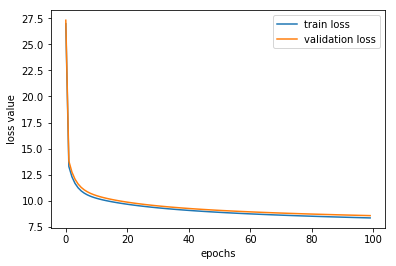

In [115]:
plt.plot(range(repeat//100), train_loss, label='train loss')
plt.plot(range(repeat//100), validation_loss, label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend(loc='best')
plt.show()

### get ans.csv with your model

In [117]:


# add bias
test_x = np.concatenate((np.ones((test_x.shape[0],1)),test_x), axis=1)

In [118]:
test_x

array([[  1. ,  15. ,   1.8, ..., 106. ,   2. ,   2.3],
       [  1. ,  12. ,   1.8, ..., 105. ,   3.3,   1.5],
       [  1. ,   8.8,   1.7, ...,   1. ,   1.5,   1.4],
       ...,
       [  1. ,  12. ,   1.8, ...,  82. ,   0.6,   0.6],
       [  1. ,  14. ,   1.8, ...,  98. ,   1.8,   1.8],
       [  1. ,  11. ,   1.7, ..., 268. ,   1.2,   0.5]])

In [122]:
ans = []
for i in range(len(test_x)):
    ans.append(["id_"+str(i)])
    a = np.dot(w,test_x[i])
    ans[i].append(a)

filename = "result/predict.csv"
text = open(filename, "w+")
s = csv.writer(text,delimiter=',',lineterminator='\n')
s.writerow(["id","value"])
for i in range(len(ans)):
    s.writerow(ans[i]) 
text.close()